
# GRIP-THE SPARKS FOUNDATION

**DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP**

**NAME : D.Asritha Reddy**

**TASK 1 : Prediction using Supervised ML**
       
       ->Predict the percentage of a student based on the no.of study hours
     

# Importing Needed Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Reading data 

In [3]:
url="http://bit.ly/w-data"
student=pd.read_csv(url)
print("Data Imported Successfully")

Data Imported Successfully


# Data Exploration

In [4]:
#take a look at the data
student.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
#summarize the data
student.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [45]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [46]:
student.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Plot each of these Features**


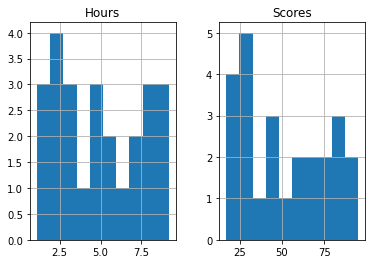

In [47]:
viz=student[['Hours','Scores']]
viz.hist()
plt.show()

**Here we are using plot() function and pass it to the column names for x-coordinate i.e Hours and y-coordinate i.e Percentage**

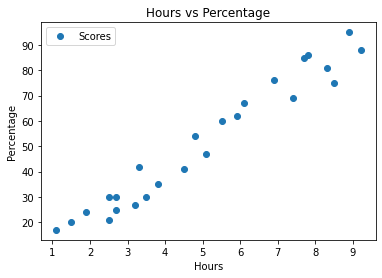

In [49]:
student.plot(x='Hours', y= 'Scores', style = 'o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

In [50]:
X = student.iloc[:, :-1].values
Y = student.iloc[:, 1].values

In [51]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [52]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

**Splitting the dataset into Train and Test Data Set**

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

**We have split our data into training and testing sets,and now we need to train our algorithm**

In [69]:
from sklearn.linear_model import LinearRegression
Regr = LinearRegression()
Regr.fit(X,Y)
print("Trained successfully")
#the coefficients
print('Coefficients:',Regr.coef_)
print('Intercept:',Regr.intercept_)

Trained successfully
Coefficients: [9.77580339]
Intercept: 2.483673405373196


**Plot the fit line over the data**

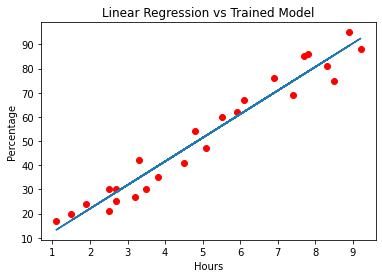

In [70]:
line = Regr.coef_*X+Regr.intercept_
plt.title("Linear Regression vs Trained Model")
plt.scatter(X,Y,color="red")
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.plot(X,line);
plt.show()

# Predictions

In [81]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [82]:
Y_pred = Regr.predict(X_test)

In [83]:
Y_pred

array([17.14737849, 33.76624426, 74.8246185 , 26.92318188, 60.16091341])

In [84]:
df = pd.DataFrame({'Actual':Y_test, 'Predicted':Y_pred})
df

,Actual,Predicted
0,20,17.147378
1,27,33.766244
2,69,74.824618
3,30,26.923182
4,62,60.160913


<AxesSubplot:>

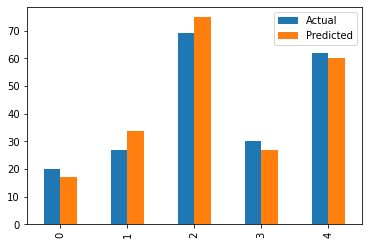

In [85]:
df.plot(kind='bar')

# Predicting the Score For Study Hour = 9.25

In [86]:
hours = 9.25
pred_score = Regr.predict([[9.25]])
print("No.of Hours is:",hours)
print("The Predicted Score of the Student is :",pred_score)

No.of Hours is: 9.25
The Predicted Score of the Student is : [92.90985477]


# Evaluating the model

In [87]:
from sklearn import metrics

In [88]:
print(" Mean Absolute Error: ", metrics.mean_absolute_error(Y_test, Y_pred))
print(" Mean Squared Error: ",metrics.mean_squared_error(Y_test,Y_pred))
print(" Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

 Mean Absolute Error:  4.071877793635608
 Mean Squared Error:  20.1389481299402
 Root Mean Squared Error:  4.487643939746134
